# P2 Milestone

## Was Maslow's Hierarchy of Needs dismantled during the COVID-19 pandemic?
Maslow's Hierarchy of Needs serves as a model for assessing human behavior. We clearly
observed a shift in behavior during the pandemic. Now, we must ask: were the blocks of the
pyramid also rearranged? By analyzing the mobility report alongside Wikipedia searches, we
aim to explore whether the hierarchy of needs remains unchanged or if it needs redefinition. We
will also try to draw a link between the blocks of the pyramid and the mobility patterns. For
example, groceries and pharmacy represent physiological needs, safety needs may include
residential or job security, love and belonging could be related to relationships and
transportation to see loved ones, and esteem can be associated with employment, and
self-actualization. Self-actualization, at the top of Maslow's Hierarchy, involves personal and
professional growth, creativity, and a deeper sense of purpose. This process may lead to a
renewed appreciation for Maslow's work or reveal new insights into human motivation during
these unique times.

![Image Alt Text](maslow.jpg)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from helpers import *
from datetime import datetime
import statsmodels.formula.api as smf

## General Description of the Notebook

For this milestone, we will be going through the provided datasets, analyzing them in different ways in order to see if they can give us an insight on whether there is a shift in the importance of some of the pyramid's sections. We will be also be using other external datasets in order to not only enhance the analysis of the provided datasets, but also to add more information relative to our topic. 

## Regions Dataframe (External Dataset)

This is an additional dataset containing countries with their region code, and the continent that they're located in. This dataset has been added in order to associate country region codes in the other datasets to their respective ccontinents. This is particularly useful in order to have more readable graphs in our anlysis.

We start off by keeping only the columns that we need using the '.loc' method. The columns that we are keeping are the countries' names, their corresponding continent (i.e. 'region') as well as their 'alpha-2' region code.

In [4]:
dfRegions=pd.read_csv('DATA/regions.csv')

# Keeping only the columns that we are interested in
dfRegions = dfRegions.loc[:,['name', 'region', 'alpha-2']]
dfRegions

FileNotFoundError: [Errno 2] No such file or directory: 'DATA/regions.csv'

Splitting the previous dataframe into multiple dataframes, each corresponding to a specififc continent.

In [16]:
# Creating a list of all possible continents
continents = dfRegions['region'].unique()

# Removing the last element of the 'continents' array, since it's a 'nan' value corresponding to antartica, 
# which can be discarded from our analysis
continents = continents[:-1]

# Creating an array of dataframes, each corresponding to a subset of the previous dataframe containing 
# countries from only one continent
dfsContinents = []
for continent in continents :
    dfsContinents.append(dfRegions[dfRegions['region'] == continent].copy())


## Interventions 

This dataset contains the dates of different types of interventions (Lockdown, public events closure, etc.) for different countries. We will show when these events occur for each of these countries, and then use this information in the analysis of other datasets.

In [17]:
interventions=pd.read_csv('DATA/interventions.csv')
interventions=process_interventions(interventions)
interventions.dtypes
interventions

,lang,1st case,1st death,School closure,Public events banned,Lockdown,Mobility,Normalcy
0,fr,2020-01-24,2020-02-14,2020-03-14,2020-03-13,2020-03-17,2020-03-16,2020-07-02
1,da,2020-02-27,2020-03-12,2020-03-13,2020-03-12,2020-03-18,2020-03-11,2020-06-05
2,de,2020-01-27,2020-03-09,2020-03-14,2020-03-22,2020-03-22,2020-03-16,2020-07-10
3,it,2020-01-31,2020-02-22,2020-03-05,2020-03-09,2020-03-11,2020-03-11,2020-06-26
4,nl,2020-02-27,2020-03-06,2020-03-11,2020-03-24,NaT,2020-03-16,2020-05-29
5,no,2020-02-26,2020-02-26,2020-03-13,2020-03-12,2020-03-24,2020-03-11,2020-06-04
6,sr,2020-03-06,2020-03-20,2020-03-15,2020-03-21,2020-03-21,2020-03-16,2020-05-02
7,sv,2020-01-31,2020-03-11,2020-03-18,2020-03-12,NaT,2020-03-11,2020-06-05
8,ko,2020-01-20,2020-02-20,2020-02-23,NaT,NaT,2020-02-25,2020-04-15
9,ca,2020-01-31,2020-02-13,2020-03-12,2020-03-08,2020-03-14,2020-03-16,NaT


Converting the data of the interventions dataframe into the proper format in order to correctly plot it.

In [18]:
interventions['Lockdown'] = pd.to_datetime(interventions['Lockdown'], format='%Y-%m-%d')
interventions['Public events banned'] = pd.to_datetime(interventions['Public events banned'], format='%Y-%m-%d')
interventions['Mobility'] = pd.to_datetime(interventions['Mobility'], format='%Y-%m-%d')

Creating a scatter plot containing the dates of different interventions of different countries.

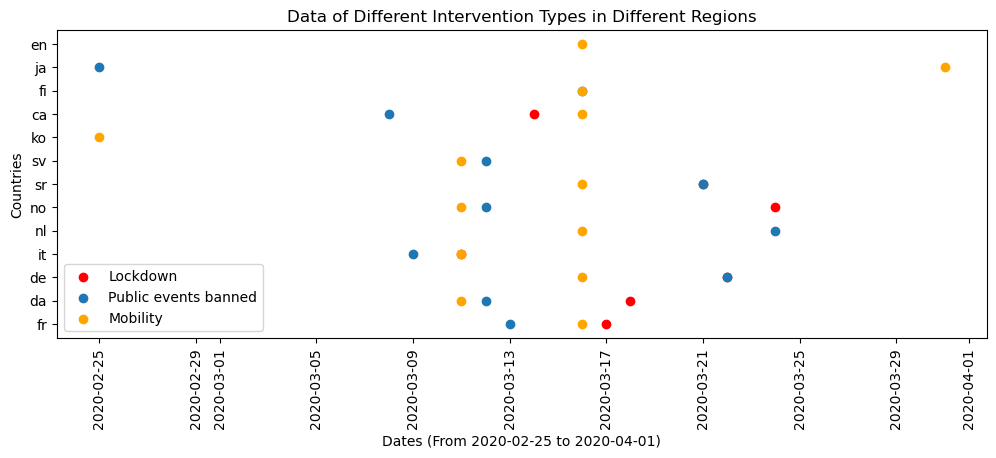

In [39]:
# Setting figure size
plt.figure(figsize=(12,4))

# Creating multiple scatter plots with the y values being the 'lang' (i.e. countries) column and the x values being different interventions
# type (Lockdown, Public events being banned and Mobility Limitations)
plt.scatter(interventions['Lockdown'],interventions['lang'],color='red',label='Lockdown')
plt.scatter(interventions['Public events banned'],interventions['lang'],label='Public events banned')
plt.scatter(interventions['Mobility'],interventions['lang'],color='orange',label='Mobility')

plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Dates (From 2020-02-25 to 2020-04-01)')
plt.ylabel('Countries')
plt.title('Data of Different Intervention Types in Different Regions')
plt.show()


## Topics linked

This dataset gives us the number of pageviews per topic. The four main topics are culture, history, geography and STEM. This gives us an initial idea of what people are generally interested in researching, which can help us understand which sections of Maslow's Hierarchy are more important than others.

First we preprocess our dataset, particularly by converting each 'False' value to 0 and each 'True' value to 1.

In [1]:
#Laod the topics and pre-process the topics_linked dataset
topics_linked=pd.read_csv('DATA/topics_linked.csv')
topics_linked=process_topics_linked(topics_linked)
topics_linked

NameError: name 'pd' is not defined

Instead of keeping track of each sub-genre with a particular topic, we decide to reduce the dataframe into a simpler one, containing the total number of pageviews for each column (and thus for each topic) by summing up all the values in a column for each column. This done through the 'sum()' method. We then sort the values within the dataframe in descending order using the 'sort_values()' method.

In [21]:
topics_agg=topics_linked.select_dtypes(include='int').sum().copy()
topics_agg=topics_agg.sort_values(ascending=False)
topics_agg

Culture.Biography.Biography*                1403864
Geography.Regions.Europe.Europe*            1008804
Culture.Media.Media*                         817879
Culture.Sports                               739892
Geography.Regions.Americas.North America     703802
                                             ...   
Geography.Regions.Africa.Western Africa       12143
Geography.Regions.Asia.Central Asia           10441
STEM.Libraries & Information                   8814
Geography.Regions.Africa.Eastern Africa        7192
Geography.Regions.Africa.Central Africa        4301
Length: 64, dtype: int64

In [22]:
topics_agg.describe()

count    6.400000e+01
mean     1.824276e+05
std      2.651203e+05
min      4.301000e+03
25%      3.186950e+04
50%      8.563600e+04
75%      1.809262e+05
max      1.403864e+06
dtype: float64

Creating a barplot in order to view the number of page searches per topic.

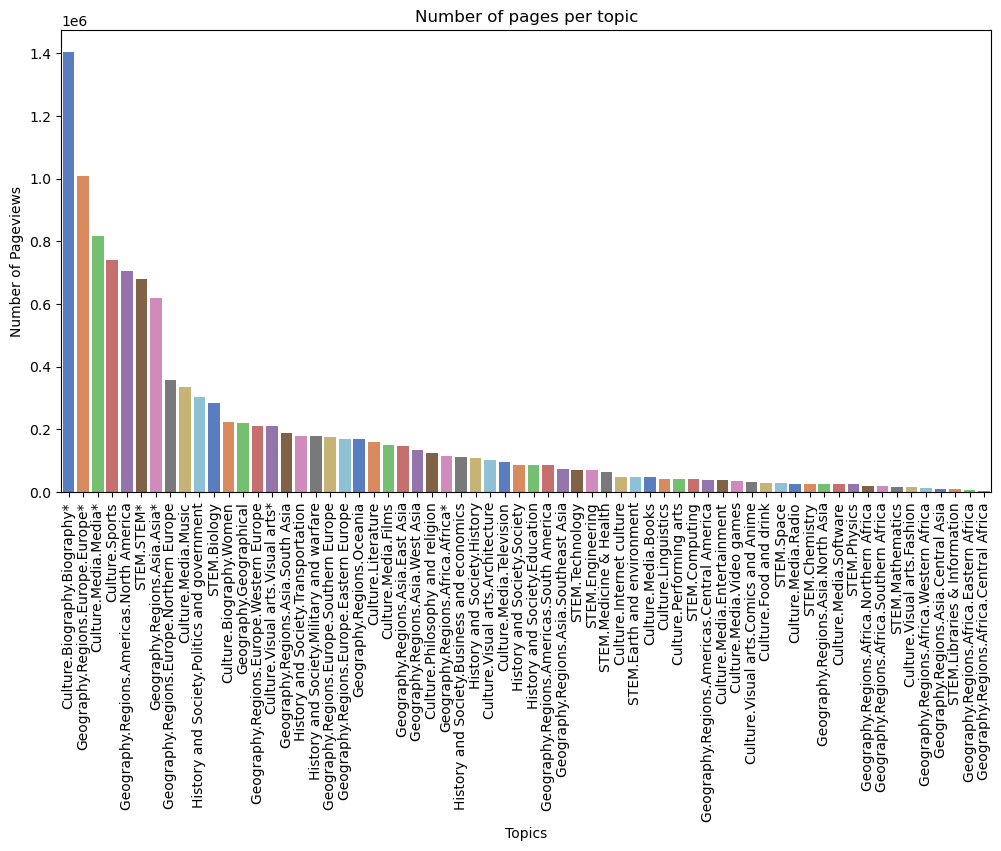

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x=topics_agg.index, y=topics_agg, palette='muted')
plt.xticks(rotation=90)
plt.title('Number of pages per topic')
plt.xlabel('Topics')
plt.ylabel('Number of Pageviews')
plt.show()

Creating an array of the different main groups of topic (Culture, History, ...)

In [24]:
topics_groups = ['Culture', 'Geography', 'History', 'STEM']

Splitting the "topics_agg" dataframe into multiple dataframes, each corresponding to a specific topic group and storing them in the array "dfsTopics".

In [25]:
dfsTopics = [] 
for topic in topics_groups :
    dfsTopics.append(topics_agg[topics_agg.index.str.contains(topic)].copy())

Creating multiple barplots, based on the main topic group.

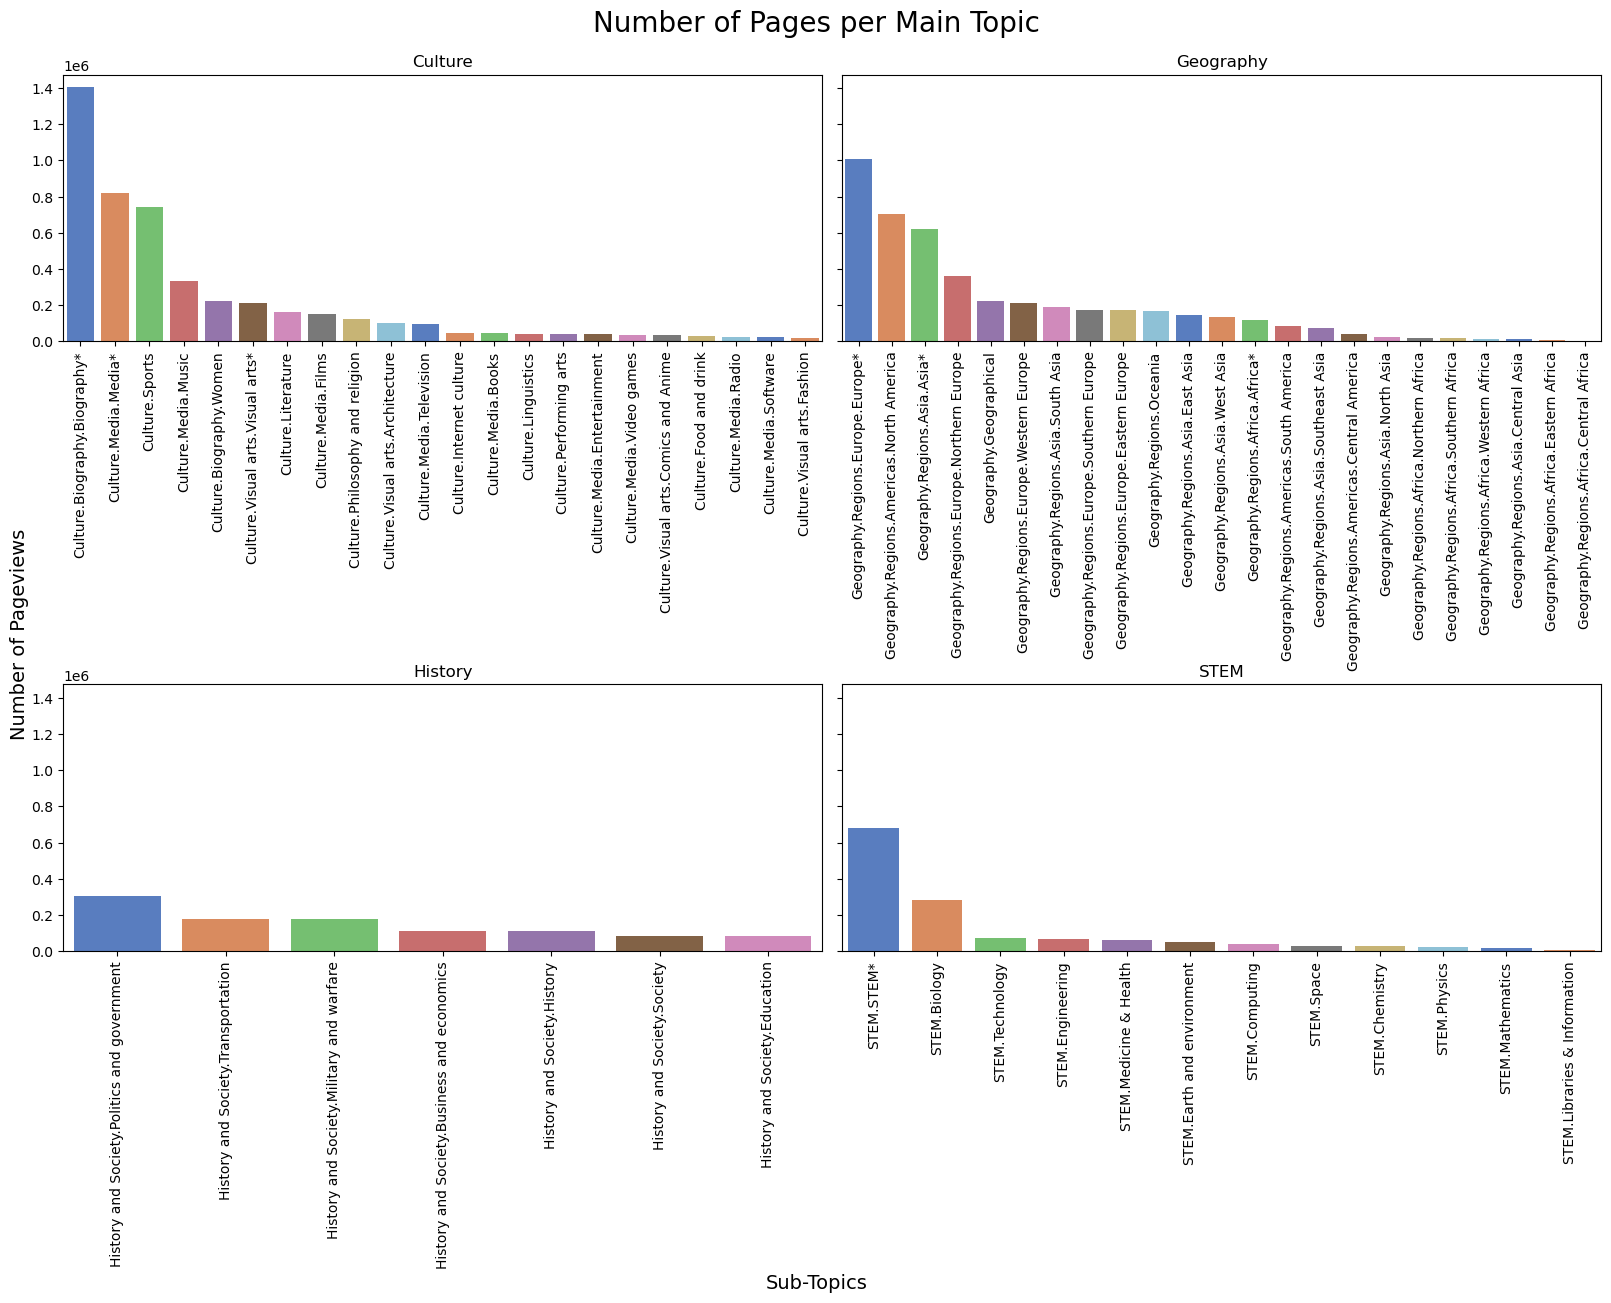

In [26]:
# Figure is 2x2 in order to have 4 different plots, for each main topic (Culture, Geography, STEM and History)
fig, axs= plt.subplots(2,2,sharey=True,sharex=False,figsize=(16,13))
for i, dfTopic in enumerate(dfsTopics) :
    # Proper conversion of i (goes from 0 to 3) into "matrix" indices for axs variable
    ax = axs[i//2][i%2]
    sns.barplot(x=dfTopic.index, y=dfTopic, palette='muted', ax=ax)
    ax.set_xticklabels(dfTopic.index, rotation=90)
    ax.set_title(topics_groups[i])


plt.tight_layout()

# Adding x and y axis titles 
fig.text(0.5, 0.00000005, 'Sub-Topics', ha='center', va='center', fontsize=14)
fig.text(0.002, 0.5, 'Number of Pageviews',
         ha='center', va='center', rotation='vertical', fontsize=14)

# Fine-tune layout to create more space at the top
plt.subplots_adjust(top=0.93)

# Adding figure title
plt.suptitle('Number of Pages per Main Topic', fontsize=20)
plt.show()

## Aggregated Time Series

The Aggregated Time Series dataset contains the number of wikipedia pageviews per topic, arranged by country, through a time interval between 2018 and 2020 (recorded daily). This means that we can observe the evolution of people's interests, and see whether some interests have become more important than others.

In [27]:
agg_ts=pd.read_json('DATA/aggregated_timeseries.json')
agg_ts


,ja.m,it,da.m,tr,no.m,en,sr,tr.m,en.m,no,...,ko.m,fi.m,sr.m,ja,fr,fi,ca,it.m,sv.m,ko
len,1197788,1594039,256451,346007,516838,6047509,632128,345790,6045654,531478,...,489181,480638,396063,1197856,2195949,481854,642031,1588312,1959446,490314
sum,"{'2018-01-01 00:00:00': 22328288, '2018-01-02 ...","{'2018-01-01 00:00:00': 3338750, '2018-01-02 0...","{'2018-01-01 00:00:00': 765123, '2018-01-02 00...","{'2018-01-01 00:00:00': 407629, '2018-01-02 00...","{'2018-01-01 00:00:00': 715031, '2018-01-02 00...","{'2018-01-01 00:00:00': 86763830, '2018-01-02 ...","{'2018-01-01 00:00:00': 192409, '2018-01-02 00...","{'2018-01-01 00:00:00': 493684, '2018-01-02 00...","{'2018-01-01 00:00:00': 135822131, '2018-01-02...","{'2018-01-01 00:00:00': 224417, '2018-01-02 00...",...,"{'2018-01-01 00:00:00': 1484496, '2018-01-02 0...","{'2018-01-01 00:00:00': 1319053, '2018-01-02 0...","{'2018-01-01 00:00:00': 451383, '2018-01-02 00...","{'2018-01-01 00:00:00': 7828155, '2018-01-02 0...","{'2018-01-01 00:00:00': 6441009, '2018-01-02 0...","{'2018-01-01 00:00:00': 523135, '2018-01-02 00...","{'2018-01-01 00:00:00': 111910, '2018-01-02 00...","{'2018-01-01 00:00:00': 12856884, '2018-01-02 ...","{'2018-01-01 00:00:00': 2383474, '2018-01-02 0...","{'2018-01-01 00:00:00': 819174, '2018-01-02 00..."
covid,"{'len': 30, 'sum': {'2018-01-01 00:00:00': 55,...","{'len': 33, 'sum': {'2018-01-01 00:00:00': 50,...","{'len': 4, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 64, 'sum': {'2018-01-01 00:00:00': 1, ...","{'len': 10, 'sum': {'2018-01-01 00:00:00': 7, ...","{'len': 306, 'sum': {'2018-01-01 00:00:00': 57...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 6, '...","{'len': 64, 'sum': {'2018-01-01 00:00:00': 3, ...","{'len': 306, 'sum': {'2018-01-01 00:00:00': 91...","{'len': 10, 'sum': {'2018-01-01 00:00:00': 2, ...",...,"{'len': 113, 'sum': {'2018-01-01 00:00:00': 6,...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 11, ...","{'len': 30, 'sum': {'2018-01-01 00:00:00': 26,...","{'len': 16, 'sum': {'2018-01-01 00:00:00': 62,...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 2, '...","{'len': 49, 'sum': {'2018-01-01 00:00:00': 6, ...","{'len': 33, 'sum': {'2018-01-01 00:00:00': 139...","{'len': 8, 'sum': {'2018-01-01 00:00:00': 19, ...","{'len': 113, 'sum': {'2018-01-01 00:00:00': 3,..."
topics,{'Culture.Biography.Biography*': {'len': 14904...,{'Culture.Biography.Biography*': {'len': 29427...,{'Culture.Biography.Biography*': {'len': 57720...,{'Culture.Biography.Biography*': {'len': 70443...,{'Culture.Biography.Biography*': {'len': 11603...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 37718...,{'Culture.Biography.Biography*': {'len': 70434...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 11804...,...,{'Culture.Biography.Biography*': {'len': 75406...,{'Culture.Biography.Biography*': {'len': 10422...,{'Culture.Biography.Biography*': {'len': 37580...,{'Culture.Biography.Biography*': {'len': 14904...,{'Culture.Biography.Biography*': {'len': 38258...,{'Culture.Biography.Biography*': {'len': 10444...,{'Culture.Biography.Biography*': {'len': 10175...,{'Culture.Biography.Biography*': {'len': 29422...,{'Culture.Biography.Biography*': {'len': 14668...,{'Culture.Biography.Biography*': {'len': 75498...


#### Naive look at different topics: case Italy

DESCRIPTION OF PROCESS FUNCTION FOR AGGREGATE TIME SERIES + GENERAL DESCRIPTION OF THE DATASET

General Case : Average of Multiple Topics

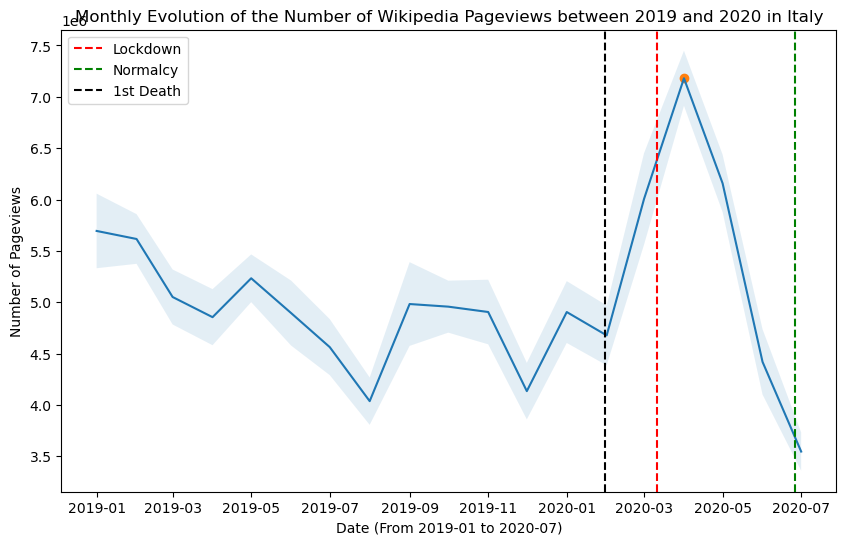

In [28]:
# Collecting only data from the Italy ("it") column and the "sum" row to collect the number of wikipedia page visits 
# (not topic specific). Then the dataframe is processed using the procees_agg_time_series() function. Finally, We only
# keep the data that corresponds to dates from 2019 to 2020 (in order to have a pre-pandemic and post-pandemic analysis)
it=process_agg_time_series(agg_ts['it']['sum'])
it=it.loc[it['year'].isin([2020,2019])]

# Averaging over the topics over IDKKKK!!!! using the '.mean()' method in order to have a general view of 
# the wikipedia page visits.
it_means=it.groupby(['year','month'])['sum'].mean().copy()

# Computing the standard error of the mean in order to then create the confidence intervals
it_sem=it.groupby(['year','month'])['sum'].sem().copy()

# Setting the indices of the averages dataframe and the standard error of the mean dataframe to the specific datetimes
it_means.index=[datetime(e[0], e[1],1) for e in it_means.index]
it_sem.index=[datetime(e[0], e[1],1) for e in it_sem.index]

# Computing the 95% confidence intervals using the standard error of the mean
CI=stats.t.interval(0.95, len(it_means)-1 , loc = it_means, scale = it_sem)


# Creating the lineplot for the average number of wikipedia pageviews in Italy between 2019 and 2020. We will be using
# our finding from the "interventions" dataset in order to observe whether the sharp increases or dropoffs within these
# evolutions are in anyway related to these interventions.

# Setting a figure size 
plt.figure(figsize=(10,6))

# Creating a lineplot using the means dataframe
sns.lineplot(it_means)

# Creating 3 vertical lines, indicating the when the interventions (Lockdown, Normalcy and 1st Case)
plt.axvline(x=[interventions['Lockdown'][3]],color='red', linestyle='--', label='Lockdown')
plt.axvline(x=[interventions['Normalcy'][3]],color='green', linestyle='--', label='Normalcy')
plt.axvline(x=[interventions['1st case'][3]],color='black', linestyle='--', label='1st Death')

# Using the 'fill_between()' method in order the implement the previously computed confidence intervals
plt.fill_between(it_means.index,CI[0],CI[1],alpha=0.12)

# Showing where the maximum number of wikipedia page visits is
plt.scatter(x=it_means.idxmax(),y=it_means.max())
plt.title('Monthly Evolution of the Number of Wikipedia Pageviews between 2019 and 2020 in Italy')
plt.xlabel('Date (From 2019-01 to 2020-07)')
plt.ylabel('Number of Pageviews')
plt.legend()
plt.show()

Specific case : Viewing the evolution for multiple topics.

<Figure size 1400x600 with 0 Axes>

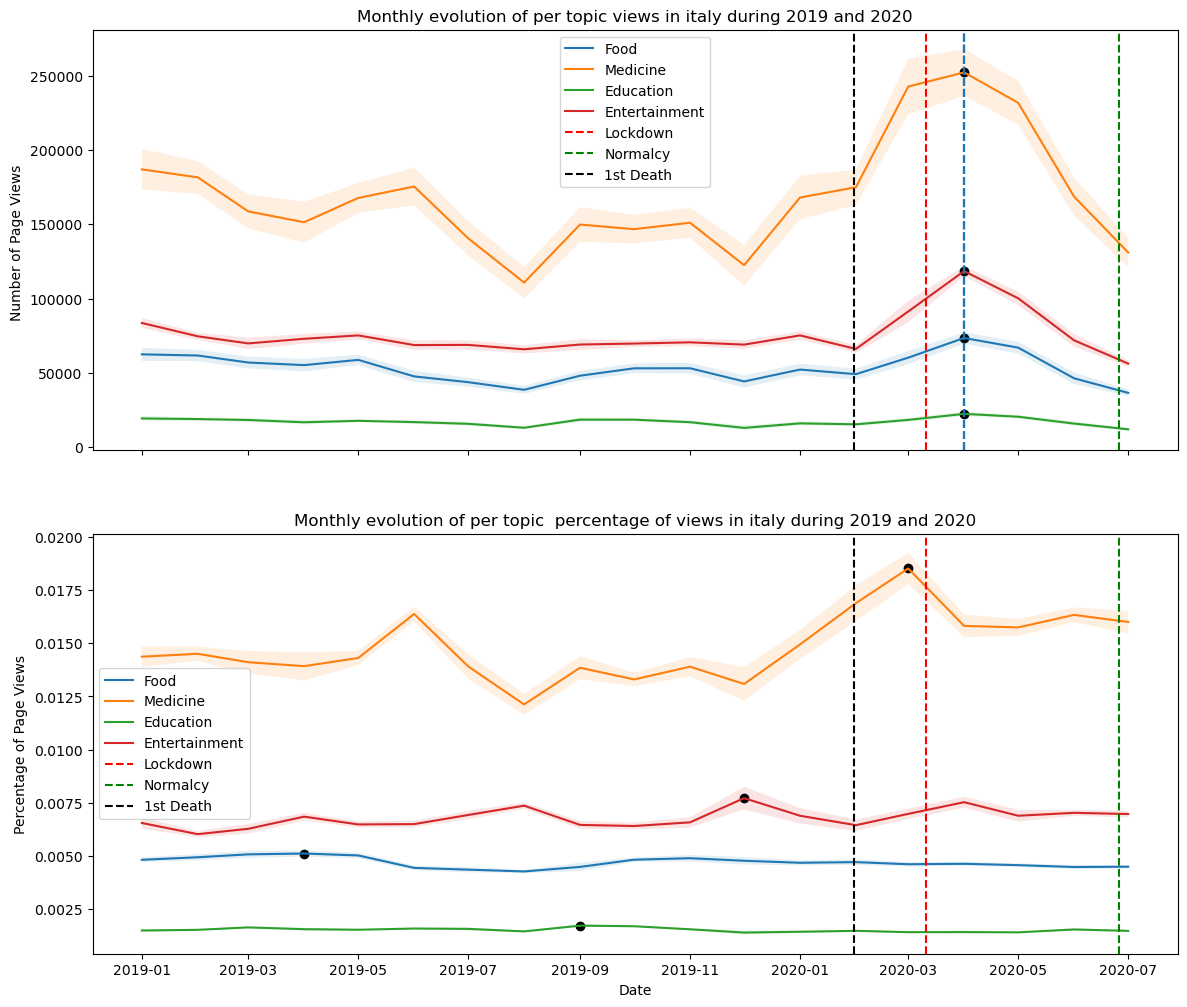

In [29]:
# Creating an array of dataframes, each correponding to a specific pageview topic. We will be viewing topics
# related to Food, Medicine, Education and Health
timeseries=[agg_ts['it']['topics']['Culture.Food and drink'],
    agg_ts['it']['topics']['STEM.Medicine & Health'],
    agg_ts['it']['topics']['History and Society.Education'],
    agg_ts['it']['topics']['Culture.Media.Entertainment']]

# Creating an array containing the different topics that are being studied
legends=['Food','Medicine','Education','Entertainment']

# Creating a figure containing the different plots.
plt.figure(figsize=(14,6))
fig,axs=plt.subplots(2,1,figsize=(14,12),sharex=True)

# Going through each individdual dataframe. A lineplot is created for each individual topic, and stacked into
# the same subplot.
for i,ts in enumerate(timeseries):
    
    # Processing each dataframe ts within the timeseries array using the 'process_agg_time_series()' 
    # function. Then, we only keep data that is relevant to the dates between 2019 and 2020
    df=process_agg_time_series(ts)
    df=df.loc[df['year'].isin([2020,2019])]
    
    # Averaging over IDKKKK!!!! over the different topics using the '.mean()' method in order to 
    # have a general view of the wikipedia page visits.
    df_means=df.groupby(['year','month'])['sum'].mean().copy()

    # Computing the standard error of the mean in order to then create the confidence intervals
    df_sem=df.groupby(['year','month'])['sum'].sem().copy()

    # Setting the indices of the averages dataframe and the standard error of the mean dataframe 
    # to the specific datetimes
    df_means.index=[datetime(e[0], e[1],1) for e in df_means.index]
    df_sem.index=[datetime(e[0], e[1],1) for e in df_sem.index]

    # Computing the 95% confidence intervals using the standard error of the mean
    CI=stats.t.interval(0.95, len(df_means)-1 , loc = df_means, scale = df_sem)

    # Creating a lineplot using the seaborn module
    sns.lineplot(df_means,label=legends[i],ax=axs[0])

    # Displaying the confidence intervals
    axs[0].fill_between(df_means.index,CI[0],CI[1],alpha=0.12)

    # Displaying the maximum number of page visits as a point and a vertical line
    axs[0].scatter(x=df_means.idxmax(),y=df_means.max(),color='black')
    axs[0].axvline(x=df_means.idxmax(), linestyle='--')

    # Adding a tile, x-axis and y-axis labels in the subplot
    axs[0].set_title('Monthly evolution of per topic views in italy during 2019 and 2020')
    axs[0].set_ylabel('Number of Page Views ')
    axs[0].set_xlabel('Dates')

    # Doing the same procedure for the previous subplot (means, standard error of the mean, 
    # 95% confidence intervals...), but instead of using the total number of wikipedia 
    # pageviews, we use the percentage values

    # Means
    df_means=df.groupby(['year','month'])['percent'].mean().copy()

    # Standard Error of the Mean
    df_sem=df.groupby(['year','month'])['percent'].sem().copy()

    # Indices Edit
    df_means.index=[datetime(e[0], e[1],1) for e in df_means.index]
    df_sem.index=[datetime(e[0], e[1],1) for e in df_sem.index]

    # Confidence Intervals
    CI=stats.t.interval(0.95, len(df_means)-1 , loc = df_means, scale = df_sem)

    # Lineplot
    sns.lineplot(df_means,label=legends[i],ax=axs[1])
    axs[1].fill_between(df_means.index,CI[0],CI[1],alpha=0.12)
    axs[1].scatter(x=df_means.idxmax(),y=df_means.max(),color='black')
    axs[1].set_title('Monthly evolution of per topic  percentage of views in italy during 2019 and 2020')
    axs[1].set_ylabel('Percentage of Page Views')   
    axs[1].set_xlabel('Date')    
    
# Creating 3 vertical lines, indicating the when the interventions (Lockdown, Normalcy and 1st Case),
# for eacch of the two subplots
for i in range(2):
    axs[i].axvline(x=[interventions['Lockdown'][3]],color='red', linestyle='--', label='Lockdown')
    axs[i].axvline(x=[interventions['Normalcy'][3]],color='green', linestyle='--', label='Normalcy')
    axs[i].axvline(x=[interventions['1st case'][3]],color='black', linestyle='--', label='1st Death')
    axs[i].legend()

plt.show()

#### Deeper look at how normalcy status affected the searches

##### General number of cases

###### Add  columns that specify the lockdown and normalcy status of italy (1 for lockdown/normalcy 0 otherwise)

To quantify our data, we would first like to correlate the state of lockdown, first death and normalcy to the number of wikipedia page visits. This can be achieved by changing the dataframe given by the aggregated time series, by adding indicator columns. e.g: if we're in a lockdown state mark the column as 1 and 0 otherwise. 

In [30]:
# Collecting the dates of different interventions in Italy
it_lockdown_date=interventions['Lockdown'][3]
it_normalcy_date=interventions['Normalcy'][3]
it_first_death=interventions['1st case'][3]

In [31]:
it=process_agg_time_series(agg_ts['it']['sum'])
it['Lockdown_status']= np.where(it['date']>=it_lockdown_date,1,0)
it['Normalcy_status']=np.where(it['date']>=it_normalcy_date,1,0)


Once this preprocessing is done, we can move the analysis. The first thing that can be done is a least squares regression in order to find the contributions of the lockdown and normalcy states.

In [ ]:
model=smf.ols(formula='sum~C(Lockdown_status)+C(Normalcy_status)',data=it)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     117.7
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           2.38e-46
Time:                        15:00:10   Log-Likelihood:                -14329.
No. Observations:                 943   AIC:                         2.866e+04
Df Residuals:                     940   BIC:                         2.868e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4

###### Interpretation:
This shows that during lockdown times, the total number of visits for italian wikipedia pages increases by approximately  1.2 million and decreases by approximately 2.7 million 
when normalcy is restored

We test the hypotheses to  show our results


In [32]:
#Aggregate the data into during and out of lockdown.
it_sum_death=it.groupby('Lockdown_status')['sum'].apply(lambda x: x.values).copy()

#Perform the t test to determine the p value
t_stat_total_view, p_val_total_view=stats.ttest_ind(it_sum_death[1],it_sum_death[0],alternative='greater')

print(f'The p-value for null hypothesis the number of views before lockdown is similar to the number of views during lockdown is: {p_val_total_view}')



The p-value for null hypothesis the number of views before lockdown is similar to the number of views during lockdown is: 5.47646312361425e-08


This gives strong statistical proof that the alternative hypothesis: total views during lockdown is greater that the total views before.

This result can be visualised with the graph below.

C:\Users\Kamal\AppData\Local\Temp\ipykernel_19140\2092784700.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2019=it.loc[it['year']==2019][it['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()
C:\Users\Kamal\AppData\Local\Temp\ipykernel_19140\2092784700.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018=it.loc[it['year']==2018][it['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()


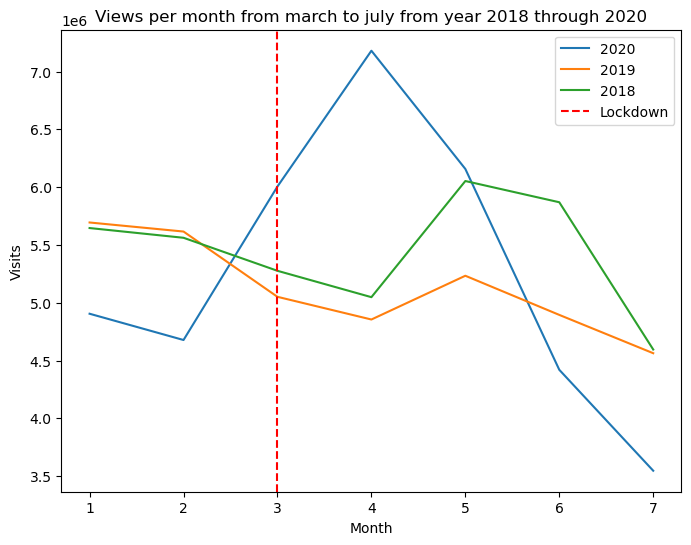

In [33]:
#Create a dataframe from the 2020 data and aggregate to obtain the mean number of views per month.
df_2020=it.loc[it['year']==2020].groupby('month')['sum'].mean().copy()

#Given that the 2020 data has months going from january to july only, select this time period for 2019 and 2018.
#Aggregate the same way that was done for 2020 
df_2019=it.loc[it['year']==2019][it['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()
df_2018=it.loc[it['year']==2018][it['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()

#PLot the three lines that represent the number of views per months for each year
plt.figure(figsize=(8,6))
sns.lineplot(df_2020,label='2020')
sns.lineplot(df_2019,label='2019')
sns.lineplot(df_2018,label='2018')

#To show lockdown state, draw a line at march, the month where lockdown happened.
plt.axvline(x=it_lockdown_date.month,color='red', linestyle='--', label='Lockdown')

#Legend and label the plot.
plt.legend()
plt.xlabel('Month')
plt.ylabel('Visits')
plt.title('Views per month from march to july from year 2018 through 2020')
plt.show()

##### Specific case (e.g: food and drink)

We can now proceed the same way for the specific case of food and drinks

In [34]:
#Construct the dataframe witht the indicator columns
food_drink=process_agg_time_series(agg_ts['it']['topics']['Culture.Food and drink'])
food_drink['Lockdown_status']= np.where(food_drink['date']>=it_lockdown_date,1,0)
food_drink['Normalcy_status']=np.where(food_drink['date']>=it_normalcy_date,1,0)
food_drink['Death_status']=np.where(food_drink['date']>=it_first_death,1,0)

In [35]:
# Fit the least squares models that depends on the Lockdown_status and Normalcy_status Variables
model=smf.ols(formula='sum~C(Lockdown_status)+C(Normalcy_status)',data=food_drink)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    sum   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     62.23
Date:                Fri, 17 Nov 2023   Prob (F-statistic):           4.16e-26
Time:                        17:58:32   Log-Likelihood:                -10270.
No. Observations:                 943   AIC:                         2.055e+04
Df Residuals:                     940   BIC:                         2.056e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                5

###### Interpretation:
This shows that during lockdown times, the total number of visits for italian wikipedia pages related to food and drinks increases by approximately 8530 and decreases by approximately 28000 when normalcy is restored.

Visualizing and computing the values 

C:\Users\Kamal\AppData\Local\Temp\ipykernel_19140\324840953.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2019=food_drink.loc[food_drink['year']==2019][food_drink['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()
C:\Users\Kamal\AppData\Local\Temp\ipykernel_19140\324840953.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2018=food_drink.loc[food_drink['year']==2018][food_drink['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()


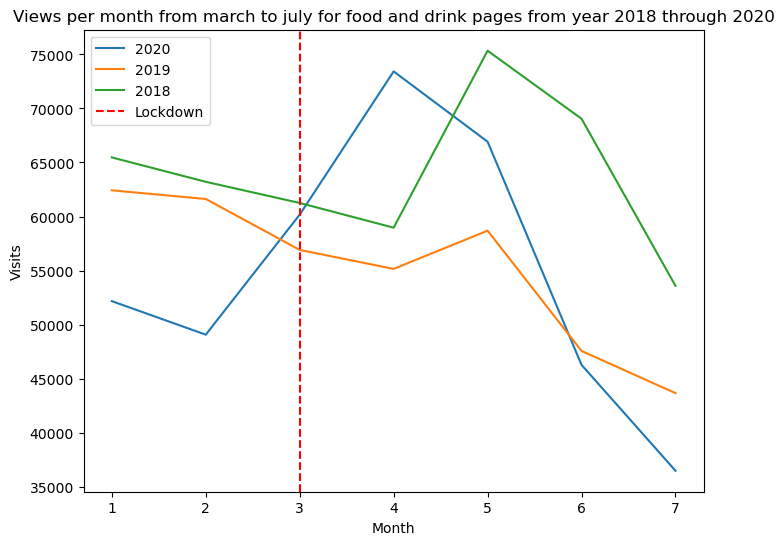

In [37]:
#Create a dataframe from the 2020 data and aggregate to obtain the mean number of views per month.
df_2020=food_drink.loc[food_drink['year']==2020].groupby('month')['sum'].mean().copy()

#Given that the 2020 data has months going from january to july only, select this time period for 2019 and 2018.
#Aggregate the same way that was done for 2020 
df_2019=food_drink.loc[food_drink['year']==2019][food_drink['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()
df_2018=food_drink.loc[food_drink['year']==2018][food_drink['month'].isin(df_2020.index)].groupby('month')['sum'].mean().copy()

#PLot the three lines that represent the number of views per months for each year
plt.figure(figsize=(8,6))
sns.lineplot(df_2020,label='2020')
sns.lineplot(df_2019,label='2019')
sns.lineplot(df_2018,label='2018')

#To show lockdown state, draw a line at march, the month where lockdown happened.
plt.axvline(x=it_lockdown_date.month,color='red', linestyle='--', label='Lockdown')

#Legend and label the plot.
plt.legend()
plt.xlabel('Month')
plt.ylabel('Visits')
plt.title('Views per month from march to july for food and drink pages from year 2018 through 2020')
plt.show()

Looking at the graph and at the computed means, we can say that our theory for overall number of views also applies to food and drink related topics.

Let's proceed similarly for the Medicine, Education and Entertainment topics:

In [38]:
for i in range(1, len(timeseries)):
    ts=timeseries[i]
    topic=legends[i]
    df=process_agg_time_series(ts)
    df['Lockdown_status']= np.where(df['date']>=it_lockdown_date,1,0)
    mean=df.groupby('Lockdown_status')['sum'].mean()
    print(f'The average of page visits during for {topic} pages is {mean[0]} per day before lockdown, compared to {mean[1]} during lockdown.')

The average of page visits during for Medicine pages is 167601.35375 per day before lockdown, compared to 206349.04195804195 during lockdown.
The average of page visits during for Education pages is 16607.54125 per day before lockdown, compared to 17912.986013986014 during lockdown.
The average of page visits during for Entertainment pages is 75308.57 per day before lockdown, compared to 88700.46153846153 during lockdown.


This also backs our initial claim: views have boosted during lockdown.

## Google Mobility Report

This dataset contains the relative percentage change from baseline of different domains (such as retail and recreation), recorded daily from 2020-02-15 to 2020-08-25, for different countries. This another oopurtunity for us to observe the impact that covid has had over the interests of pindividuals.

In [ ]:
global_mr=pd.read_csv('DATA/Global_Mobility_Report.csv')
global_mr

C:\Users\alyel\AppData\Local\Temp\ipykernel_9544\3088372953.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  global_mr=pd.read_csv('DATA/Global_Mobility_Report.csv')


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111407,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-19,NaN,NaN,NaN,NaN,-9.0,NaN
2111408,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-20,NaN,NaN,NaN,NaN,-5.0,NaN
2111409,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-21,NaN,NaN,NaN,NaN,-5.0,NaN
2111410,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-24,NaN,NaN,NaN,NaN,-4.0,NaN


Before we start our analysis, we decide to reduce the dataset by averaging the values collected over the aformentioned timeframe for each country, and thus giving us the average percntage change relative to the baseline, over a particular time period. We also drop the 'census_fips_code' column, since it is irrelevant to our analysis.

In [ ]:
# The '.groupby()' and '.mean()' allow us to group the data from different rows corresponding to the same region code, 
# into one row, containing the mean of all the different rows.
global_agg=global_mr.groupby('country_region_code').mean(numeric_only=True).drop(columns='census_fips_code')
global_agg

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,
AE,-28.387306,-11.090026,-41.386380,-43.049442,-22.715674,14.878285
AF,-19.912162,-1.847973,-9.412162,-18.236486,-19.881757,7.885135
AG,-30.805699,-19.554404,-16.784974,-46.477231,-37.728155,13.721649
AO,-25.450633,-11.704225,-21.655440,-41.285366,-10.830010,14.616580
AR,-53.483347,-18.887372,-64.393354,-51.869822,-19.517832,15.258667
...,...,...,...,...,...,...
VN,-20.398234,-6.192182,-20.022184,-18.359323,1.945353,6.229507
YE,-2.005181,5.849741,-3.694301,-2.440415,-6.637306,4.284974
ZA,-33.098446,-16.607772,-19.333161,-41.013200,-26.366839,15.698964


Splitting the dataframe into multiple dataframes by continents. The idea is to first create a "continents_column" array that will be the same length as the number of rows in the "global_agg" dataframe, and each continent will correspond to the contry region code of each row. 

In [ ]:
continents_column = []

# Creating a copy to avoid unwanted changes later on.
global_agg_copy = global_agg.copy()

# Go through every row (thus every region code).
for i in range(len(global_agg_copy.index)) :
    current_code = global_agg_copy.index[i]
    found_continent = 0

    # Go through every dataframe in the "dfsContinents" array and check to see if current region code is within this dataframe. Since every
    # dataframe corresponds to only one specific continent, if the region code is contained within the dataframe, then the associated
    # continent has been found and thus we exit the loop.
    for df in dfsContinents :
        if current_code in df['alpha-2'].values :
            found_continent  = df.iloc[0]['region']
            break

    continents_column.append(found_continent)

# Adding a 'continents' coluumn to the 'global_agg_copy', associating every region code to its continent.
global_agg_copy['continents'] = continents_column

# Splitting this new dataframe into multiple dataframes, each corresponding to a specific continent, and then storing them in the
# 'dfsGlobal_agg' array.
dfsGlobal_agg = []
for continent in continents :
    dfsGlobal_agg.append(global_agg_copy[global_agg_copy['continents'] == continent].copy())


Creating the same barplot, but this time taking only countries that are in Europe

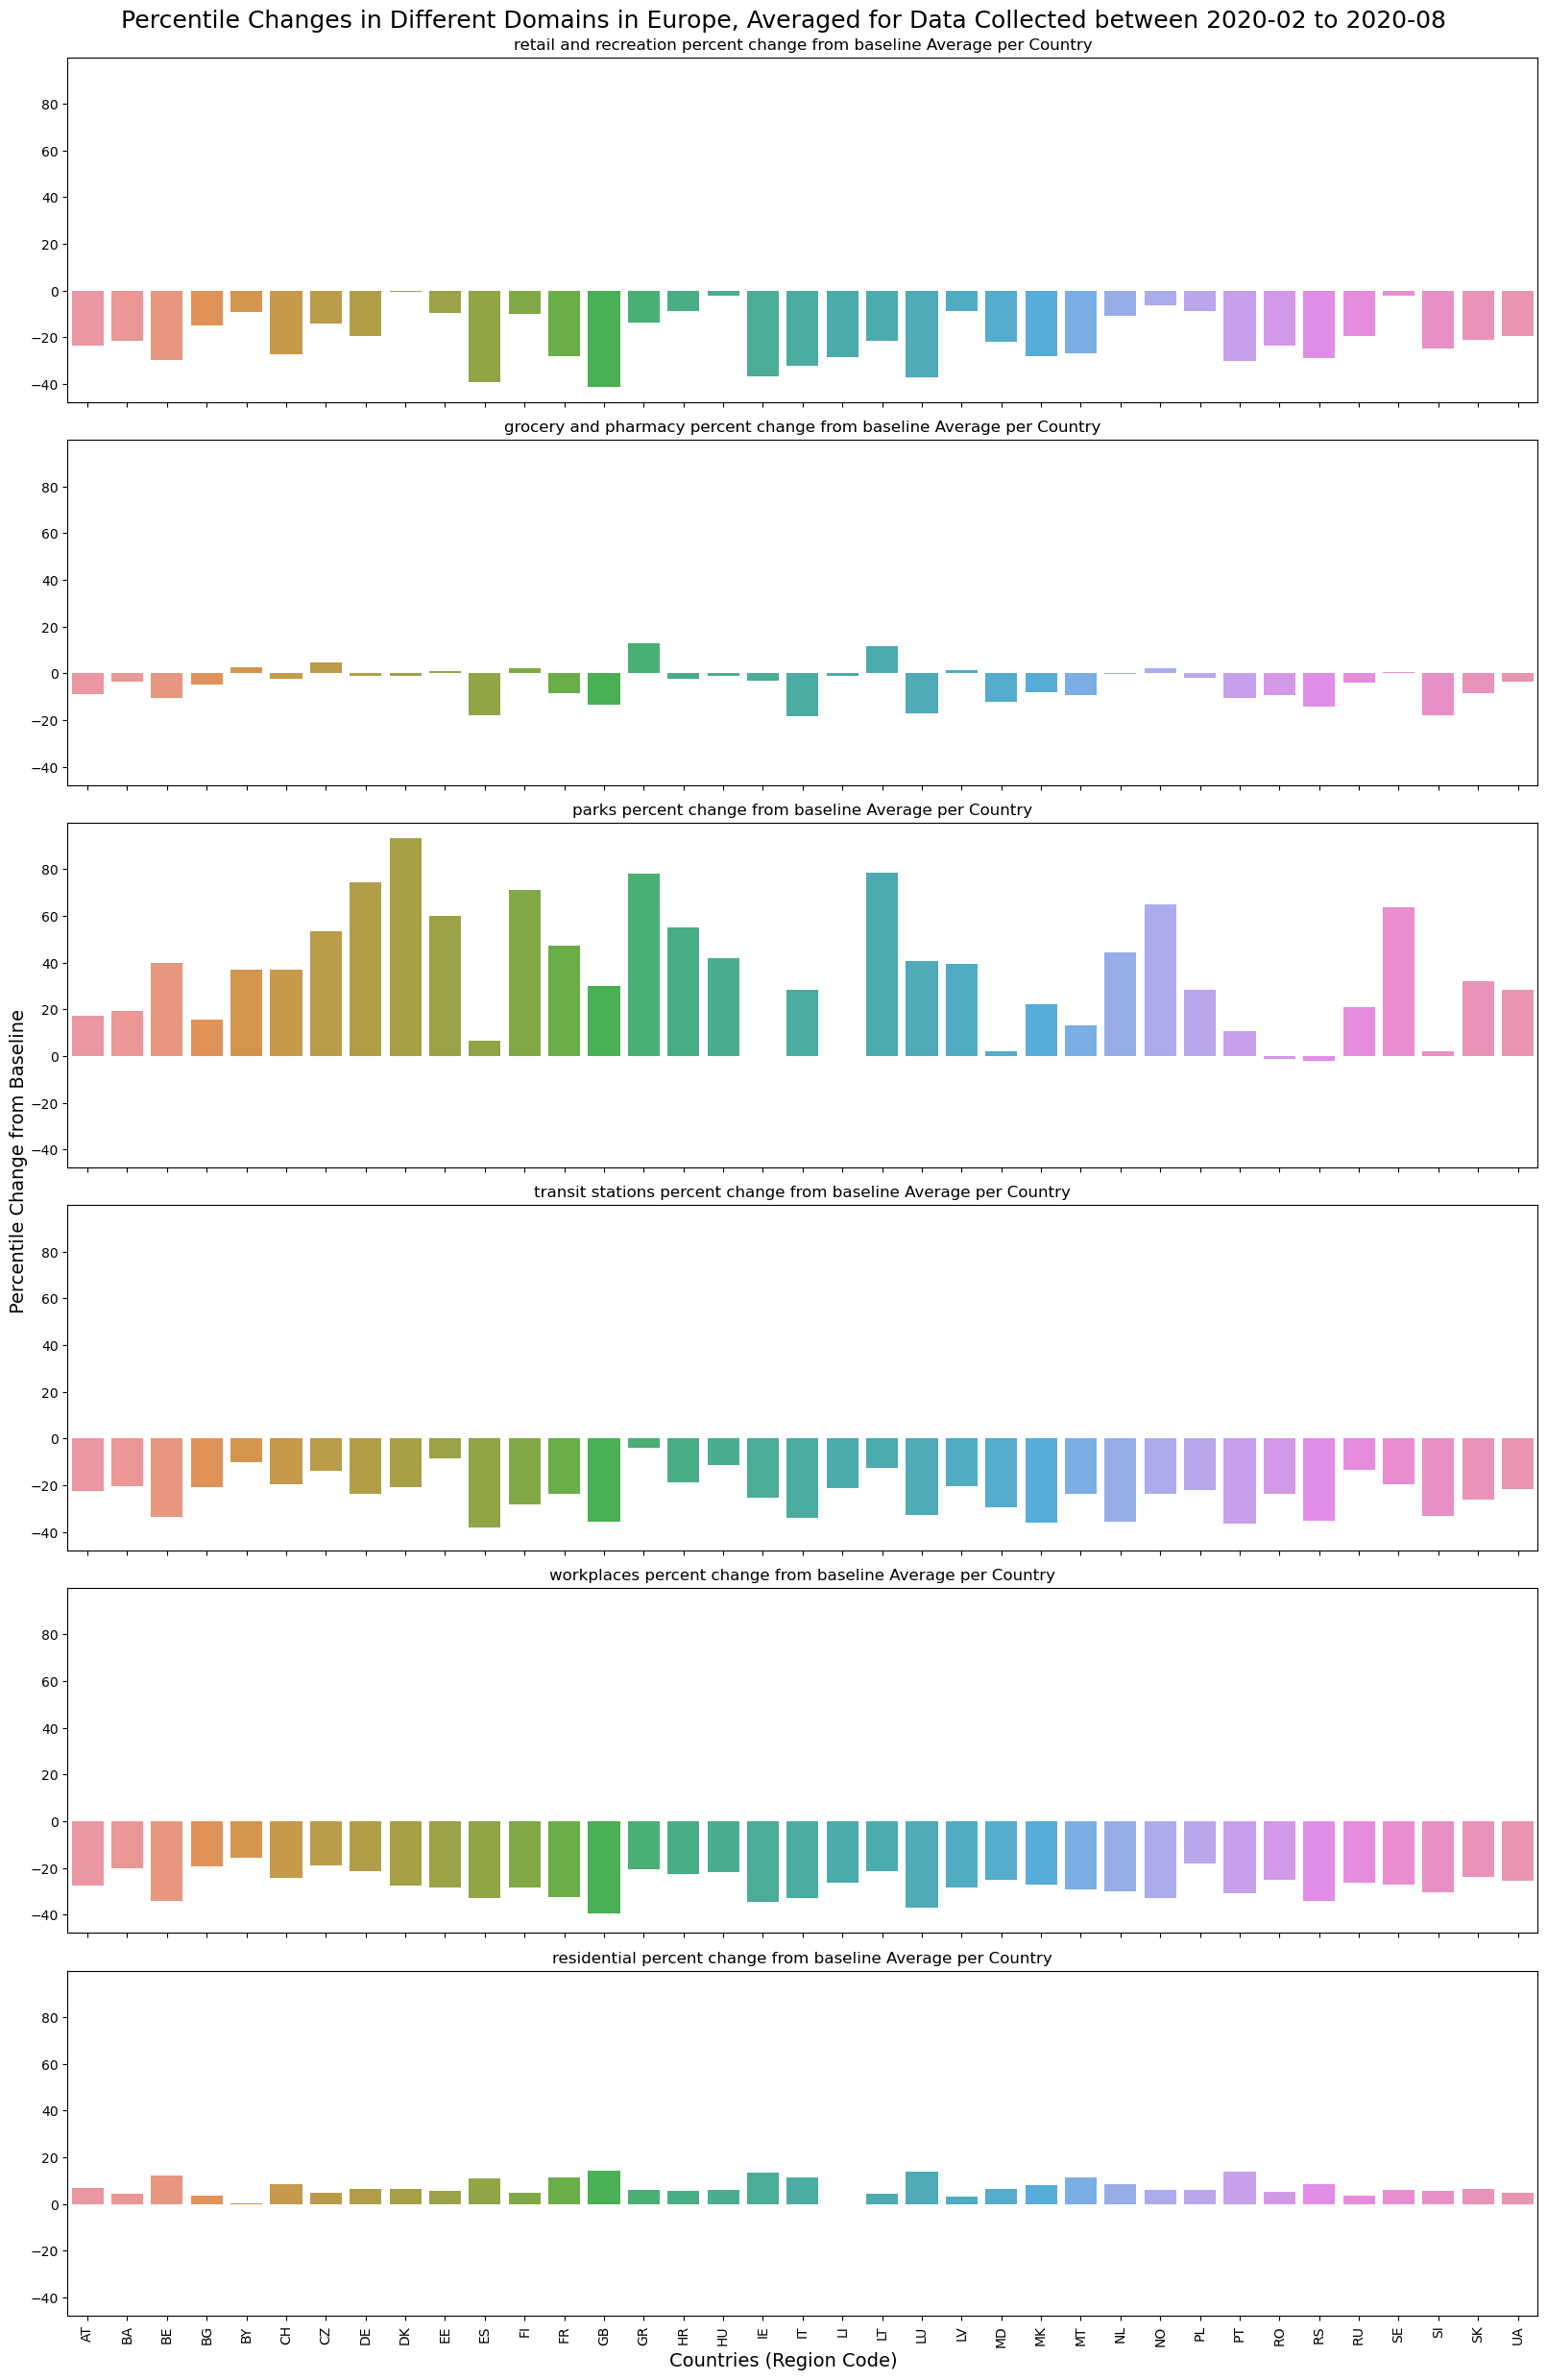

In [ ]:
# Figure contains 6 x 1 plots, 6 for each domain, considering only countries within Europe
fig, axs= plt.subplots(6,1,sharey=True,sharex=True,figsize=(16,25))

# Since the most recent dataframe contains an extra column corresponding to the continent of the 
# associated region code (and not a particular domain to be analyzed), we need to retreive the original 
# set of columns corresponding strictly to the domains, which is what we do in the line of code below.
og_columns = global_agg.columns

# Enumertaing of the different dataframes corresponding to the different continents
for j, df  in enumerate(dfsGlobal_agg) :
    if continents[j] == 'Europe' :
        # Enumerating over trhe different columns, and thus the domains
        for i, col in enumerate(og_columns):

            # Proper index formating in order to obtain the correct subplot
            ax=axs[i]

            # Creating a barplot for the specific domain, for a specific continent
            sns.barplot(y=df[col],x=df.index,ax=ax)
            # ax.set_xlabel('Countries (Region Code)')
            ax.set_xlabel('')
            # ax.set_ylabel('Percentage Change from Baseline')
            ax.set_ylabel('')
            ax.set_xticklabels(df.index, rotation=90)
            ax.set_title(str(col).replace('_'," ") + ' Average per Country')

fig.text(0.5, 0.00000005, 'Countries (Region Code)', ha='center', va='center', fontsize=14)
fig.text(0.002, 0.5, 'Percentile Change from Baseline',
         ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()

# Add more space at the top to avoid overlapping between the title and the rest of the figure.
plt.subplots_adjust(top=0.96)

plt.suptitle('Percentile Changes in Different Domains in Europe, Averaged for Data Collected between 2020-02 to 2020-08', fontsize=18)
plt.show()

# Apple Mobility Trends

This dataset contains the use percentage (with the first day where data was recorded being set at 100%, to be used as a baseline) during a given day, of a particular transportation type (either Driving, Walking or Transit) for different countries. Data has been recorded daily, between 2020-01-13 and 2020-04-20. We can use this dataset to see how covid has impacted how people use different mobility types, and thus evaluate how this can some how represent a shift in importance in Maslow's pyramid.

In [ ]:
apple_mr=pd.read_csv('DATA/applemobilitytrends-2020-04-20.csv')
apple_mr

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,100,95.30,101.43,97.20,103.55,112.67,104.83,...,25.47,24.89,32.64,31.43,30.67,30.00,29.26,22.94,24.55,31.51
1,country/region,Albania,walking,100,100.68,98.93,98.46,100.85,100.13,82.13,...,27.63,29.59,35.52,38.08,35.48,39.15,34.58,27.76,27.93,36.72
2,country/region,Argentina,driving,100,97.07,102.45,111.21,118.45,124.01,95.44,...,19.40,12.89,21.10,22.29,23.55,24.40,27.17,23.19,14.54,26.67
3,country/region,Argentina,walking,100,95.11,101.37,112.67,116.72,114.14,84.54,...,15.75,10.45,16.35,16.66,17.42,18.18,18.80,17.03,10.59,18.44
4,country/region,Australia,driving,100,102.98,104.21,108.63,109.08,89.00,99.35,...,26.95,31.72,53.14,55.91,56.56,58.77,47.51,36.90,53.34,56.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,city,Washington DC,transit,100,100.78,103.92,105.02,112.26,96.01,87.76,...,16.99,14.23,17.01,17.37,17.02,17.10,17.14,16.61,16.66,18.20
391,city,Washington DC,walking,100,99.07,109.61,104.16,123.16,119.71,106.28,...,44.63,32.84,33.58,37.56,38.69,37.76,42.50,41.80,43.51,41.89
392,city,Zurich,driving,100,102.38,110.84,105.48,113.83,109.67,102.03,...,63.78,54.97,67.09,72.52,74.89,77.13,78.01,73.62,71.97,73.74
393,city,Zurich,transit,100,101.51,108.93,97.87,103.91,98.50,93.83,...,29.18,31.49,32.90,35.71,35.68,33.65,36.77,36.75,37.66,37.50


Create a new dataframe where we subtract 100 from all values, in order to show the relative change from the baseline

In [ ]:
# Creating an array containing the columns from which we will not subtract anything, since they do not contain any values
columnsExcluded = ['geo_type', 'region', 'transportation_type']

# Creating a ccopy of the dataframe in order to avoid any unwanted changes moving forward.
apple_mr_copy = apple_mr.copy()

# Subtracting 100 from all applicable columns using the '.iloc' and 'isin' methods
apple_mr_copy.iloc[:, ~apple_mr_copy.columns.isin(columnsExcluded)] = \
                       apple_mr_copy.loc[:, ~apple_mr_copy.columns.isin(columnsExcluded)] -100
apple_mr_copy

,geo_type,region,transportation_type,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2020-04-11,2020-04-12,2020-04-13,2020-04-14,2020-04-15,2020-04-16,2020-04-17,2020-04-18,2020-04-19,2020-04-20
0,country/region,Albania,driving,0,-4.70,1.43,-2.80,3.55,12.67,4.83,...,-74.53,-75.11,-67.36,-68.57,-69.33,-70.00,-70.74,-77.06,-75.45,-68.49
1,country/region,Albania,walking,0,0.68,-1.07,-1.54,0.85,0.13,-17.87,...,-72.37,-70.41,-64.48,-61.92,-64.52,-60.85,-65.42,-72.24,-72.07,-63.28
2,country/region,Argentina,driving,0,-2.93,2.45,11.21,18.45,24.01,-4.56,...,-80.60,-87.11,-78.90,-77.71,-76.45,-75.60,-72.83,-76.81,-85.46,-73.33
3,country/region,Argentina,walking,0,-4.89,1.37,12.67,16.72,14.14,-15.46,...,-84.25,-89.55,-83.65,-83.34,-82.58,-81.82,-81.20,-82.97,-89.41,-81.56
4,country/region,Australia,driving,0,2.98,4.21,8.63,9.08,-11.00,-0.65,...,-73.05,-68.28,-46.86,-44.09,-43.44,-41.23,-52.49,-63.10,-46.66,-43.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,city,Washington DC,transit,0,0.78,3.92,5.02,12.26,-3.99,-12.24,...,-83.01,-85.77,-82.99,-82.63,-82.98,-82.90,-82.86,-83.39,-83.34,-81.80
391,city,Washington DC,walking,0,-0.93,9.61,4.16,23.16,19.71,6.28,...,-55.37,-67.16,-66.42,-62.44,-61.31,-62.24,-57.50,-58.20,-56.49,-58.11
392,city,Zurich,driving,0,2.38,10.84,5.48,13.83,9.67,2.03,...,-36.22,-45.03,-32.91,-27.48,-25.11,-22.87,-21.99,-26.38,-28.03,-26.26
393,city,Zurich,transit,0,1.51,8.93,-2.13,3.91,-1.50,-6.17,...,-70.82,-68.51,-67.10,-64.29,-64.32,-66.35,-63.23,-63.25,-62.34,-62.50


Split the original dataframe into different dataframes based on the transportation type, and store them in the array "dfsApple".

In [ ]:
# Creating an array conatining the 3 different transportation types using the '.unique()' method.
transportationType = apple_mr_copy['transportation_type'].unique()

# Array where we will store the different datafrmes based on transportation type.
dfsApple = []

#Creating the different dataframes
for transport in transportationType :
    dfsApple.append(apple_mr_copy[apple_mr_copy['transportation_type'] == transport].copy())

Calculate the average of each column in order to have a worldwide analysis.

In [ ]:
# Remove the first three columns for the dataframes since they don't contain any values
dfsAppleVals = []
for df in dfsApple :
    dfCopy = df.copy()
    dfCopy = dfCopy.loc[:, ~dfCopy.columns.isin(columnsExcluded)]
    dfsAppleVals.append(dfCopy)

# Calculate Averages of Columns of each dataframe
dfsAvgs = []
for df in dfsAppleVals :
    dfsAvgs.append(df.mean().copy())

### Case Study : Worldwide By Averaging

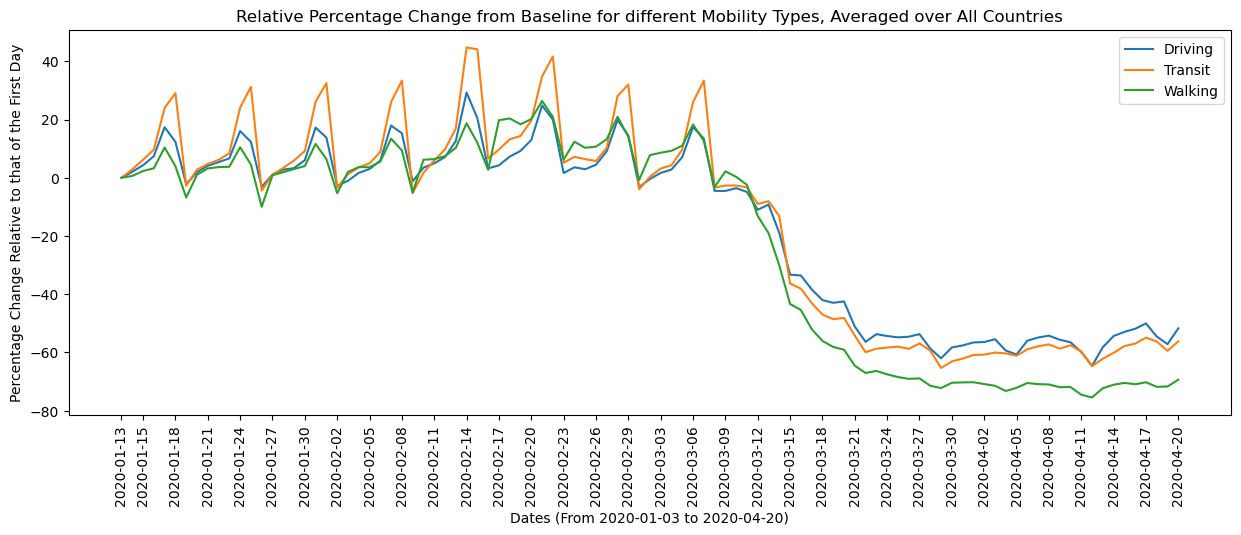

In [ ]:
# Collectig all of the dates from the dataframe (corresponds to all of the columns except the first 3)
dates = apple_mr_copy.columns
dates = dates[3:]

# Reduce the dates array in order to make the plots more readable (we only take the dates that are in 
# positions that correspond to multiples of 3)
dates_mod = dates[(np.arange(len(dates)) + 1) % 3 == 0]

# Putting the first date back into to the reduced dates array
dates_mod = dates_mod.insert(0, dates[0])

plt.figure(figsize=(15,5))

# Creating a lineplot containing the evolution for different transportation types
sns.lineplot(x=dates, y=dfsAvgs[0], label= 'Driving')
sns.lineplot(x=dates, y=dfsAvgs[1], label= 'Transit')
sns.lineplot(x=dates, y=dfsAvgs[2], label= 'Walking')
plt.xticks(rotation=90)
plt.xticks(dates_mod)
plt.xlabel('Dates (From 2020-01-03 to 2020-04-20)')
plt.ylabel('Percentage Change Relative to that of the First Day')

plt.legend()

plt.title('Relative Percentage Change from Baseline for different Mobility Types, Averaged over All Countries')
plt.show()

### Case Study : Italy 
This is particularly intersting since we can combine this analysis with the one we did for the 'interventions' dataset, and observe the correlation between the date of these interventions and the evolution of the usage of these different mobility types.

In [ ]:
# Adapting the timestamp variables from the interventions datasets in order to implement 
# them in the following graphs (and converting them in order for them to be compatible 
# when creating the plots) 
itLockdown = interventions['Lockdown'][3].strftime('%Y-%m-%d %H:%M:%S')
itLockdown = itLockdown.replace(" 00:00:00", "")
itNormalcy = interventions['Normalcy'][3].strftime('%Y-%m-%d %H:%M:%S')
itNormalcy = itNormalcy.replace(" 00:00:00", "")
it1stCase = interventions['1st case'][3].strftime('%Y-%m-%d %H:%M:%S')
it1stCase = it1stCase.replace(" 00:00:00", "")

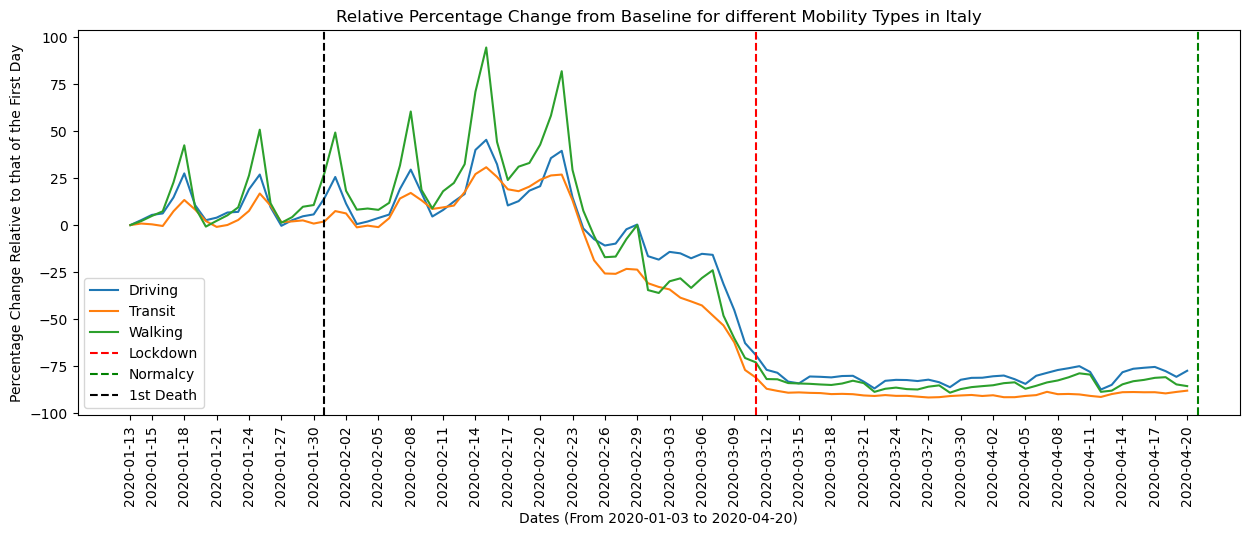

In [ ]:
# Collecting data that's only relevant to italy
apple_italy = apple_mr_copy[apple_mr_copy['region'] == 'Italy'].copy()
apple_italy = apple_italy.iloc[:, ~apple_italy.columns.isin(columnsExcluded)]

 
plt.figure(figsize=(15,5))

# Creating a lineplot containing the evolution for different transportation types
sns.lineplot(x=dates, y=apple_italy.values[0], label= 'Driving')
sns.lineplot(x=dates, y=apple_italy.values[1], label= 'Transit')
sns.lineplot(x=dates, y=apple_italy.values[2], label= 'Walking')

plt.xticks(rotation=90)
plt.xticks(dates_mod)

# Creating 3 vertical lines, indicating the when the interventions (Lockdown, Normalcy and 1st Case)
plt.axvline(x=itLockdown,color='red', linestyle='--', label='Lockdown')
plt.axvline(x=itNormalcy,color='green', linestyle='--', label='Normalcy')
plt.axvline(x=it1stCase,color='black', linestyle='--', label='1st Death')

plt.xlabel('Dates (From 2020-01-03 to 2020-04-20)')
plt.ylabel('Percentage Change Relative to that of the First Day')
plt.legend()

plt.title('Relative Percentage Change from Baseline for different Mobility Types in Italy')
plt.show()

We can see in the figure above that the decrease in the transport use percentage, for all three mobility types, starts to decrease after thre is a first Covid case, and by the time lockdown is fully in place, the transport usage has drastically decreased. This shows the impact of Covid-19 related interventions on the mobility types.

### Case Study : Different European Countries

Creating an array that contains different european country that we would like to study

In [ ]:
euroCountries = ['France',
                 'Denmark',
                 'Germany',
                 'Italy',
                 'Netherlands',
                 'Norway',
                 'Sweden',
                 'Canada',
                 'Finland',
                 'Switzerland',
                 'UK',
                 'Spain']


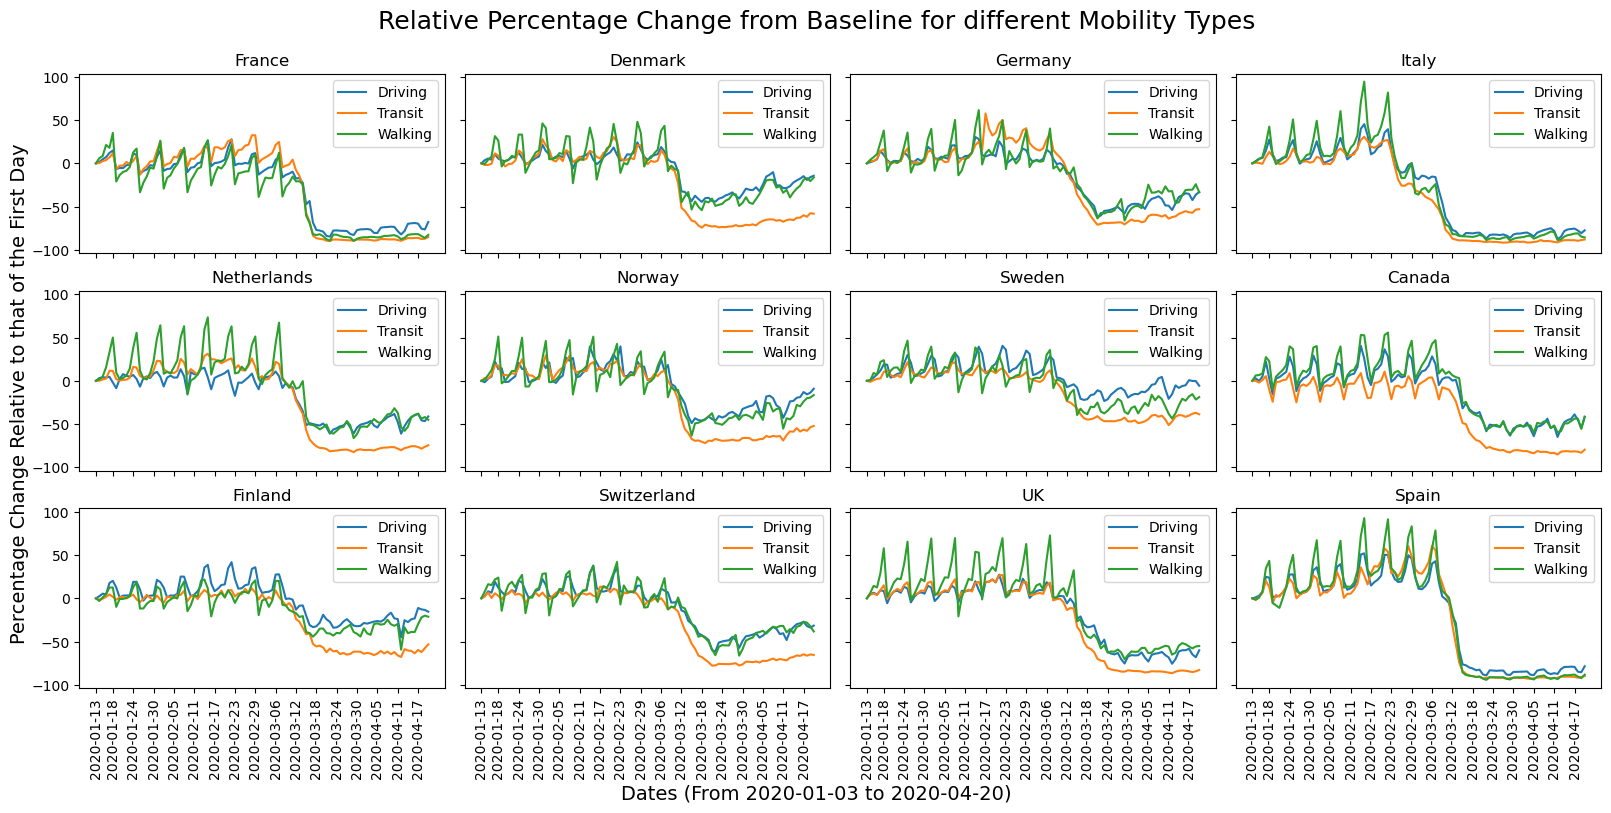

In [ ]:
# Reduce the dates array in order to make the plots more readable (we only take the dates that are in 
# positions that correspond to multiples of 6)
dates_mod2 = dates[(np.arange(len(dates)) + 1) % 6 == 0]

# Putting the first date back into the modified dates array
dates_mod2 = dates_mod2.insert(0, dates[0])

# Figure contains 3x4 (12) subplots, one for each european country that we will be analyzing 
fig, axs= plt.subplots(3, 4, sharey=True, sharex=True, figsize=(16,8))

# Iterate over every country in the 'euroCountries' array
for i, country in enumerate(euroCountries) :

    # Create a dataframe containing only the data for the specific country and removes the 
    # first three columns that don't contain values
    dfAppleCurrent = apple_mr_copy[apple_mr_copy['region'] == country].copy()
    dfAppleCurrent = dfAppleCurrent.iloc[:, ~dfAppleCurrent.columns.isin(columnsExcluded)]

    # Proper index formating to be at the right plot
    ax = axs[i//4, i%4]

    # Create three lineplots, one for each mobility type
    sns.lineplot(x=dates, y=dfAppleCurrent.values[0], label= 'Driving', ax=ax)
    sns.lineplot(x=dates, y=dfAppleCurrent.values[1], label= 'Transit', ax=ax)
    sns.lineplot(x=dates, y=dfAppleCurrent.values[2], label= 'Walking', ax=ax)

    # Setting the dates for the x-axis to the ones corresponding to the 'dates_mod2' array,
    # in order to have more readable plots, and turn them vertically
    ax.set_xticks(dates_mod2)
    ax.set_xticklabels(labels= dates_mod2,rotation=90)    
    ax.set_title(country)

# Adding general titles to the x and y-axis
fig.text(0.5, 0.00000005, 'Dates (From 2020-01-03 to 2020-04-20)', ha='center',
         va='center', fontsize=14)
fig.text(0.002, 0.5, 'Percentage Change Relative to that of the First Day', ha='center',
         va='center', rotation='vertical', fontsize=14)

# Addjusting figure formatting
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Adding a general title
plt.suptitle('Relative Percentage Change from Baseline for different Mobility Types', fontsize=18)
plt.show()

From this data we can observe that there is indeed a decline in mobility patterns after lockdown. However linking this decrease to a physiological need is not trivial. Physiological needs incorporate all types of most basic needs such as grocery shopping, which is usually done using a car or public transport. The latter cannot be accuratly used to relate to grocery shopping being the reason of the remaining presence of this means of transportation since its use was greatly diminished due also to the higher risk of contamination with the contact of other strangers in a closed space. We however can observe in all these graphs that driving mobility trends are nearly always the ones following the smallest decline. This could be due to the effect of the basic need of grocery shopping, that had to still be fulfilled even during the pandemic. These mobility trends are however not sufficient to make any meaningful conclusions.

However, love and belonging which implies interacting with people that are not always in the same household as you, saw a big dent during the global pandemic and this can be interpreted by this mobility report. Restricted mobility resulted in far less interactions with friends, partners and other long distance relationships. People therefore had a harder time socially during the pandemic and put less interest in their social relations.

# EU Employment Trends

In [41]:
#import data
dfeu = pd.read_csv('DATA/eu.tsv',sep='\t')
dfeu.head()

,"s_adj,age,unit,sex,geo\time",2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,2020M01,2019M12,2019M11,...,1983M10,1983M09,1983M08,1983M07,1983M06,1983M05,1983M04,1983M03,1983M02,1983M01
0,"NSA,TOTAL,PC_ACT,F,AT",6.0,6.2,5.2,4.9,4.7,4.1,4.4,4.0,3.9,...,:,:,:,:,:,:,:,:,:,:
1,"NSA,TOTAL,PC_ACT,F,BE",5.4,5.0,5.0,5.2,5.0,4.9,4.8,4.6,4.5,...,:,:,:,:,:,:,:,:,:,:
2,"NSA,TOTAL,PC_ACT,F,BG",3.9,3.9,4.2,4.7,4.1,4.2,4.3,3.9,3.8,...,:,:,:,:,:,:,:,:,:,:
3,"NSA,TOTAL,PC_ACT,F,CH",:,4.4,4.3,4.4,4.6,4.6,4.5,4.1,4.0,...,:,:,:,:,:,:,:,:,:,:
4,"NSA,TOTAL,PC_ACT,F,CY",7.2,6.6,6.4,6.8,7.1,7.5,7.9,7.5,7.7,...,:,:,:,:,:,:,:,:,:,:


We observe five columns corresponding to the type of data (Seasonally adjusted or not), the age range, the unit of measure, sex and geography two digit code for the country of interest. The remaining columns correspond to timestamps, each corresponding of a month ranging from january 1983 to june 2020.

In [42]:
#we import a dataset with a list of countries to associated to the 2 letter code given in the original dataset
countries = pd.read_csv('DATA/countries_list.csv.xls')
countries.head()

,Country,Country_code
0,Åland Islands,AX
1,Afghanistan,AF
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


We want to analyse unemployment and witness a shift during the pandemic, unemployment is also affected temporally with the normal socio-economic differences in time, therefore data going back more than a year is not relevant to our study, we will therefore remove columns corresponding to years before 2019

In [43]:
#separate the first column in different column indices
dfeuc = dfeu.copy()
dfeuc['C2'] = dfeu['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[-1])
dfeuc['age'] = dfeu['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[1])
dfeuc['unit'] = dfeu['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[2])
dfeuc['sex'] = dfeu['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[3])
dfeuc['s_adj'] = dfeu['s_adj,age,unit,sex,geo\\time'].apply(lambda x: x.split(",")[0])
#remove unwanted years
selected_cols = ['C2','age','unit','sex', 's_adj', 
                 '2020M07 ', '2020M06 ', '2020M05 ', '2020M04 ','2020M03 ','2020M02 ','2020M01 ',
                 '2019M12 ','2019M11 ','2019M10 ','2019M09 ','2019M08 ','2019M07 ',
                 '2019M06 ','2019M05 ','2019M04 ','2019M03 ','2019M02 ','2019M01 ']

dfeuc = dfeuc[selected_cols]
dfeuc.head()

,C2,age,unit,sex,s_adj,2020M07,2020M06,2020M05,2020M04,2020M03,...,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01
0,AT,TOTAL,PC_ACT,F,NSA,6.0,6.2,5.2,4.9,4.7,...,4.2,3.8,4.8,4.7,4.1,4.4,4.8,4.5,5.0,4.3
1,BE,TOTAL,PC_ACT,F,NSA,5.4,5.0,5.0,5.2,5.0,...,4.7,5.0,5.3,5.3,5.0,4.9,5.0,4.9,4.9,5.1
2,BG,TOTAL,PC_ACT,F,NSA,3.9,3.9,4.2,4.7,4.1,...,3.6,3.4,3.4,3.5,3.5,3.7,4.0,4.4,4.7,4.7
3,CH,TOTAL,PC_ACT,F,NSA,:,4.4,4.3,4.4,4.6,...,4.2,4.9,5.0,4.8,4.3,4.3,4.6,5.2,5.5,5.4
4,CY,TOTAL,PC_ACT,F,NSA,7.2,6.6,6.4,6.8,7.1,...,5.8,6.9,9.1,9.2,7.3,6.0,6.7,9.2,10.4,10.1


We observe a column unit, it can be either 'PC_ACT' meaning percentage active population or 'THS_PER' standing for thousands of persons. These two units can be intereseting to analyse unemployment

With this dataset came data in two forms, with seasonal adjustment and without. Our analysis will focus in the change in needs after a event (or treatment in our terms) being the global pandemic, therefore we want to compare the effect of this event, without have interference from other outside effect, such as seasonal effects. Therefore we will here drop the data that is not seasonally adjusted as we want data that has no regular seasonal patterns to be able to compare using difference in differences (DiD) the control group (pre corona) and treatment group (post corona).

In [44]:
#remove NSA rows
dfeuc.drop(dfeuc.loc[dfeuc['s_adj'] !='SA'].index, inplace=True)
#we remove the adj column as it is no longer useful
dfeuc.drop('s_adj', axis=1,inplace=True)
dfeuc.head()

,C2,age,unit,sex,2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,...,2019M10,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01
726,AT,TOTAL,PC_ACT,F,4.5,4.7,4.9,4.7,4.4,4.3,...,4.2,4.2,4.2,4.4,4.3,4.5,4.6,4.7,4.6,4.6
727,BE,TOTAL,PC_ACT,F,5.1,5.1,5.2,5.2,5.0,4.9,...,4.8,4.9,5.0,5.1,5.1,5.1,5.0,5.0,5.0,5.1
728,BG,TOTAL,PC_ACT,F,4.1,4.1,4.4,4.6,3.9,3.8,...,3.8,3.7,3.6,3.7,3.7,3.8,4.0,4.2,4.3,4.3
729,CH,TOTAL,PC_ACT,F,:,4.7,4.6,4.5,4.5,4.4,...,4.3,4.6,4.7,4.7,4.6,4.6,4.8,5.1,5.3,5.3
730,CY,TOTAL,PC_ACT,F,6.3,7.2,8.4,8.1,6.4,6.0,...,7.5,7.6,7.8,7.9,7.8,7.8,8.0,8.2,8.4,8.4


Merge with the dataset with country names



In [45]:
#column renaming
dfeuc = dfeuc.rename(columns={'C2': "Country_code"})
dfeuc_merged = dfeuc.merge(countries, on="Country_code")
dfeuc_merged.head()

,Country_code,age,unit,sex,2020M07,2020M06,2020M05,2020M04,2020M03,2020M02,...,2019M09,2019M08,2019M07,2019M06,2019M05,2019M04,2019M03,2019M02,2019M01,Country
0,AT,TOTAL,PC_ACT,F,4.5,4.7,4.9,4.7,4.4,4.3,...,4.2,4.2,4.4,4.3,4.5,4.6,4.7,4.6,4.6,Austria
1,AT,TOTAL,PC_ACT,M,5.8,6.0,6.1,4.7,4.7,4.6,...,4.7,4.7,4.5,4.5,4.5,4.7,4.7,4.9,5.0,Austria
2,AT,TOTAL,PC_ACT,T,5.2,5.4,5.5,4.7,4.6,4.4,...,4.5,4.5,4.5,4.4,4.5,4.6,4.7,4.8,4.8,Austria
3,AT,TOTAL,THS_PER,F,96,102,104,101,93,91,...,88,90,93,92,95,98,100,99,98,Austria
4,AT,TOTAL,THS_PER,M,142,146,149,113,115,111,...,114,113,108,108,109,113,114,117,120,Austria


We now need to pivot the dataset to have timeseries data



In [46]:
#we use the melt function to pivot the dataset
dfts = dfeuc_merged.melt(id_vars=["Country", "age", "unit", "sex", "Country_code"], 
        var_name="Date", 
        value_name="Value")

dfts.head()

,Country,age,unit,sex,Country_code,Date,Value
0,Austria,TOTAL,PC_ACT,F,AT,2020M07,4.5
1,Austria,TOTAL,PC_ACT,M,AT,2020M07,5.8
2,Austria,TOTAL,PC_ACT,T,AT,2020M07,5.2
3,Austria,TOTAL,THS_PER,F,AT,2020M07,96
4,Austria,TOTAL,THS_PER,M,AT,2020M07,142


We now clean the column value to remove missing values or non digit data and or spaces

In [47]:
import re
#removing non digit data and space
dfts['Value'] = dfts['Value'].apply(lambda x: re.sub(r"[a-zA-Z: ]", "", x))
dfts['Value'] = dfts['Value'].apply(lambda x: x.replace(" ",""))

dfts = dfts.loc[~(dfts.Value=="")]

dfts['Value'] = dfts['Value'].apply(lambda x: float(x))

To have a general outlook of this dataset, we will only focus on one county, Italy. We will look at year span of 25 to 74 and all sexes.


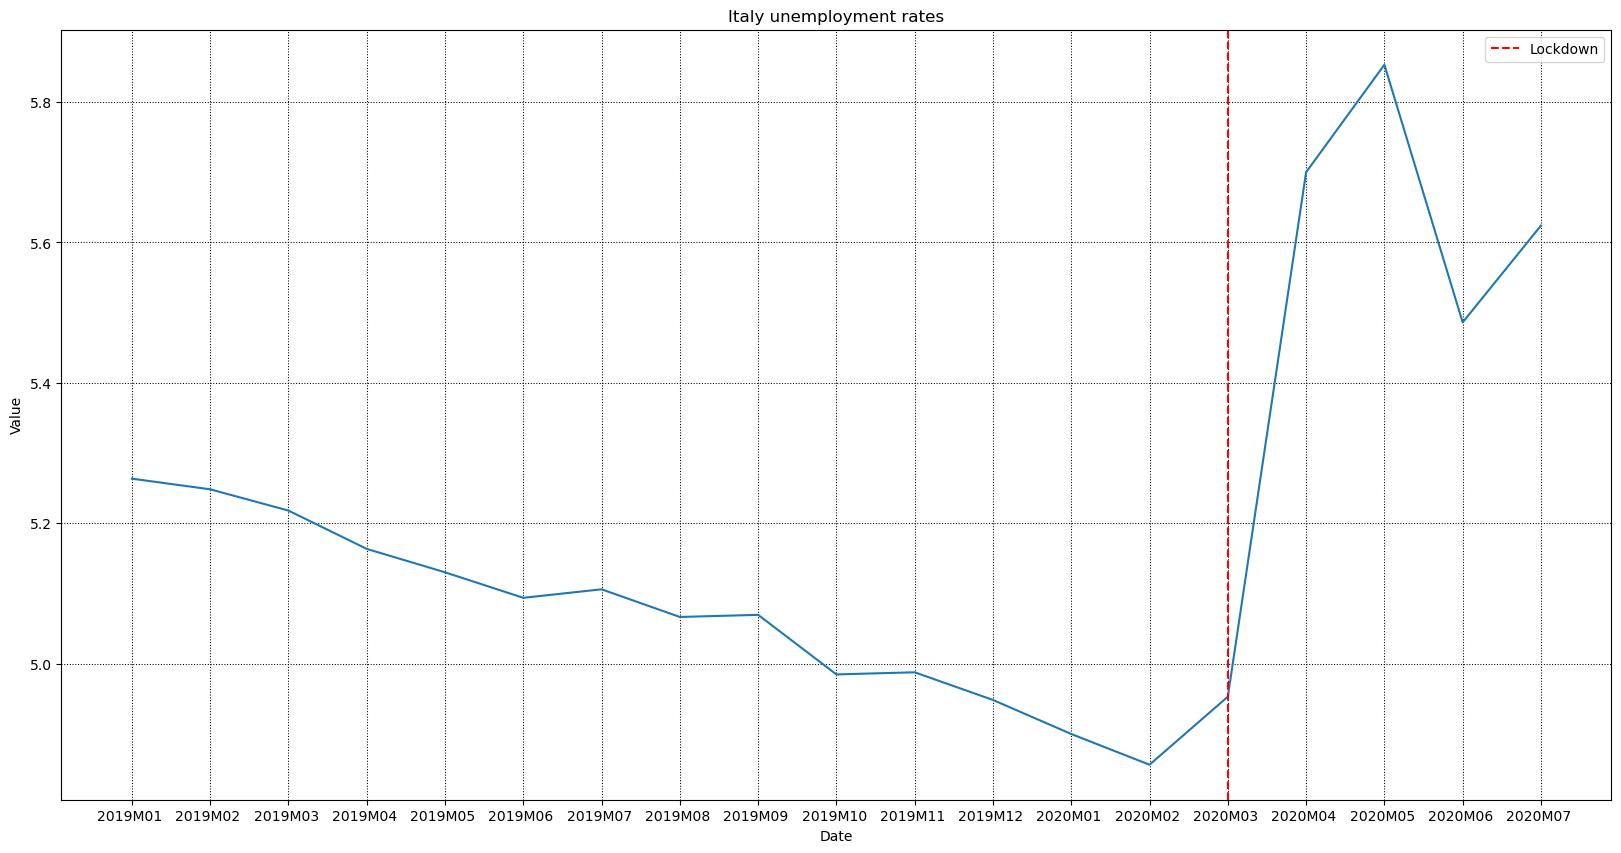

In [48]:
#Select the relevant rows of the dataset we wish to plot
total_y25_74_df = dfts.loc[(dfts.age=='Y25-74')&(dfts.unit=='PC_ACT')&(dfts.sex=='T')]
#plot the data
plt.figure(figsize=(20, 10))
sns.lineplot(x=np.flip(total_y25_74_df["Date"]), y=np.flip(total_y25_74_df['Value']), errorbar=None)
plt.axvline(x=total_y25_74_df["Date"].iloc[130],color='red', linestyle='--', label='Lockdown')
plt.title('Italy unemployment rates') 
plt.grid(color='black', linestyle='dotted', linewidth=0.75)
plt.legend()
#plt.xticks(rotation=90)
plt.show()

We have now cleaned and visualized data from this data set that can prove useful to quantify changes in the safety needs category of Maslow's hierarchy of needs. We already observe a difference between pre and post lockdown measures, a difference which will be more rigorously analysed in the following milestone.